## Running a Neural Network with Python
<br><br>

### A Neural Network Class

<br>
<img width="40%" class="imgright" src="../images/turn_on_neural_network.webp" srcset="../images/turn_on_neural_network_700w.webp 700w,../images/turn_on_neural_network_600w.webp 600w,../images/turn_on_neural_network_500w.webp 500w,../images/turn_on_neural_network_400w.webp 400w,../images/turn_on_neural_network_350w.webp 350w,../images/turn_on_neural_network_300w.webp 300w" alt="Turn on neural network" />

We learned in the previous chapter of our tutorial on neural networks the most important facts about weights. We saw how they are used and how we can implement them in Python. We saw that the multiplication of the weights with the input values can be accomplished with arrays from Numpy by applying matrix multiplication.

However, what we hadn't done was to test them in a real neural network environment. We have to create this environment first. We will now create a class in Python, implementing a neural network. We will proceed in small steps so that everything is easy to understand.

The most essential methods our class needs are:

- ```__init__``` to initialize a class, i.e. we will set the number of neurons for every layer and initialize the weight matrices.
- ```run```: A method which is applied to a sample, which which we want to classify. It applies this sample to the neural network. We could say, we 'run' the network to 'predict' the result. This method is in other implementations often known as ```predict```.
- ```train```: This method gets a sample and the corresponding target value as an input. With this input it can adjust the weight values if necessary. This means the network learns from an input. Seen from the user point of view, we 'train' the network. In ```sklearn``` for example, this method is called ```fit```

We will postpone the definition of the ```train``` and ```run``` method until later. The weight matrices should be initialized inside of the ```__init__``` method. We do this indirectly. We define a method ```create_weight_matrices``` and call it in ```__init__```. In this way, the init method remains clear.

We will also postpone adding bias nodes to the layers.

The following Python code contains an implementation of a neural network class applying the knowledge we worked out in the previous chapter:

In [13]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
   
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes 
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate  
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
           
    
    def train(self):
        pass
    
    def run(self):
        pass


We cannot do a lot with this code, but we can at least initialize it. We can also have a look at the weight matrices:

In [14]:

simple_network = NeuralNetwork(no_of_in_nodes = 3, 
                               no_of_out_nodes = 2, 
                               no_of_hidden_nodes = 4,
                               learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[-0.3460287  -0.19427278 -0.19102916]
 [ 0.56743476 -0.47164202 -0.06910573]
 [ 0.53013469 -0.05117752 -0.430623  ]
 [ 0.48414483  0.31263278 -0.08123676]]
[[-0.12645547  0.05260599 -0.36278102 -0.32649173]
 [-0.20841352 -0.01456191 -0.13778649 -0.08920465]]


### Activation Functions, Sigmoid and ReLU

Before we can program the ```run``` method, we have to deal with the activation function. We had the following diagram in the introductory chapter on neural networks:

<img width="80%" src="../images/neuron_neural_network_detailled_view.webp" srcset="../images/neuron_neural_network_detailled_view_800w.webp 800w,../images/neuron_neural_network_detailled_view_700w.webp 700w,../images/neuron_neural_network_detailled_view_600w.webp 600w,../images/neuron_neural_network_detailled_view_500w.webp 500w,../images/neuron_neural_network_detailled_view_400w.webp 400w,../images/neuron_neural_network_detailled_view_350w.webp 350w,../images/neuron_neural_network_detailled_view_300w.webp 300w" alt="Detailled view of a Perceptron of a Neural Network" />

The input values of a perceptron are processed by the summation function and followed by an activation function, transforming the output of the summation function into a desired and more suitable output.
The summation function means that we will have a matrix multiplication of the weight vectors and the input values. 

There are lots of different activation functions used in neural networks. One of the most comprehensive overviews of possible [activation functions](https://en.wikipedia.org/wiki/Activation_function) can be found at Wikipedia. 

The sigmoid function is one of the often used activation functions. The sigmoid function, which we are using, is also known as the Logistic function.

It is defined as 
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Let us have a look at the graph of the sigmoid function. We use matplotlib to plot the sigmoid function:

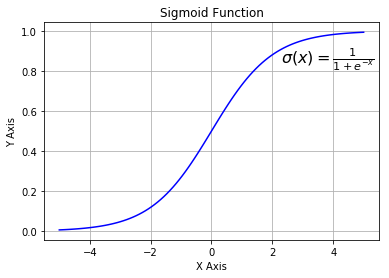

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)


plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)


plt.show()

Looking at the graph, we can see that the sigmoid function maps a given number ```x``` into the range of numbers between 0 and 1. 0 and 1 not included! 
As the value of ```x``` gets larger, the value of the sigmoid function gets closer and closer to 1 and as ```x``` gets smaller, the value of the sigmoid function is approaching 0.

Instead of defining the sigmoid function ourselves, we can also use the expit function from ```scipy.special```, which is an implementation of the sigmoid function. It can be applied on various data classes like int, float, list, numpy,ndarray and so on. The result is an ndarray of the same shape as the input data x. 

In [16]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


The logistic function is often often used in neural networks to introduce nonlinearity in the model and to map signals into a specified range, i.e. 0 and 1. It is also well liked because the derivative - needed in backpropagation - is simple. 

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

and its derivative:

$$\sigma'(x) = \sigma(x)(1 - \sigma(x))$$

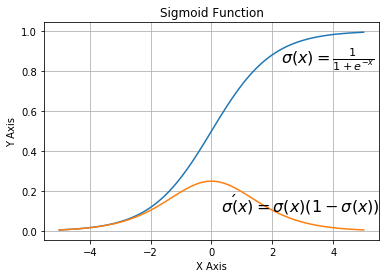

In [17]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)

plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)


plt.show()

We can also define our own sigmoid function with the decorator vectorize from numpy:

In [18]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])


array([0.95257413, 0.98201379, 0.99330715])

Another easy to use activation function is the ReLU function. ReLU stands for rectified linear unit. It is also known as the ramp function.  It is defined as the positve part of its argument, i.e. $y = \max{(0, x)}$. This is 
"currently, the most successful and widely-used activation function is the Rectified Linear Unit (ReLU)"<sup>1</sup>
The ReLu function is computationally more efficient than Sigmoid like functions, because Relu means only choosing the maximum between 0 and the argument ```x```. Whereas Sigmoids need to perform expensive exponential operations.

In [19]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)

# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

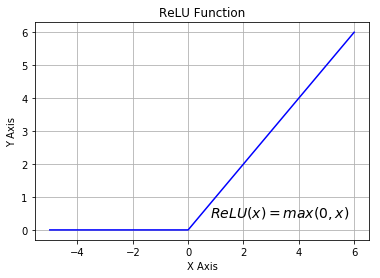

In [20]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

### Adding a run Method

We have everything together now to implement the ```run``` (or ```predict```) method of our neural network class. We will use ```scipy.special``` as the activation function and rename it to ```activation_function```:

In [21]:
from scipy.special import expit as activation_function

All we have to do in the ```run``` method consists of the following. 
1. Matrix multiplication of the input vector and the weights_in_hidden matrix.
2. Applying the activation function to the result of step 1
3. Matrix multiplication of the result vector of step 2 and the weights_in_hidden matrix.
4. To get the final result: Applying the activation function to the result of 3

In [22]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector
            

We can instantiate an instance of this class, which will be a neural network. In the following example we create a network with two input nodes, four hidden nodes, and two output nodes.

In [23]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)

We can apply the run method to all arrays with a shape of (2,), also lists and tuples with two numerical elements. The result of the call is defined by the random values of the weights:

In [24]:
simple_network.run([(3, 4)])

array([[0.54558831],
       [0.6834667 ]])


<h3>Footnotes</h3>
<br>
<sup>1</sup> Ramachandran, Prajit; Barret, Zoph; Quoc, V. Le (October 16, 2017). ["Searching for Activation Functions"](https://arxiv.org/abs/1710.05941). 